In [11]:
import os
import sys
import re
from matplotlib import pyplot as plt
from coffea.util import load
from omegaconf import OmegaConf
import numpy as np
import awkward as ak
import mplhep as hep

hep.style.use("CMS")

In [12]:
var_dict = {
    r"MET $p_{\mathrm{T}}$ [GeV]": [
        "PuppiMET_pt",
        "PuppiMETPNet_pt",
        "PuppiMETPNetPlusNeutrino_pt",
    ],
    r"MET $\phi$": ["PuppiMET_phi", "PuppiMETPNet_phi", "PuppiMETPNetPlusNeutrino_phi"],
    r"MET_MinusMuons $p_{\mathrm{T}}$ [GeV]": [
        "PuppiMET_MuonGood_pt",
        "PuppiMETPNet_MuonGood_pt",
        "PuppiMETPNetPlusNeutrino_MuonGood_pt",
    ],
    r"MET_MinusMuons $\phi$": [
        "PuppiMET_MuonGood_phi",
        "PuppiMETPNet_MuonGood_phi",
        "PuppiMETPNetPlusNeutrino_MuonGood_phi",
    ],
    r"$-u_{||}/q_{T}$": [
        "PuppiMET_MuonGood_response",
        "PuppiMETPNet_MuonGood_response",
        "PuppiMETPNetPlusNeutrino_MuonGood_response",
    ],
    r"$u_{||}+q_{T}$ [GeV]": [
        "PuppiMET_MuonGood_u_paral_predict",
        "PuppiMETPNet_MuonGood_u_paral_predict",
        "PuppiMETPNetPlusNeutrino_MuonGood_u_paral_predict",
    ],
    r"$u_{\perp}$ [GeV]": [
        "PuppiMET_MuonGood_u_perp_predict",
        "PuppiMETPNet_MuonGood_u_perp_predict",
        "PuppiMETPNetPlusNeutrino_MuonGood_u_perp_predict",
    ],
    r"Puppi MET $p_{\mathrm{T}}$ [GeV]": ["PuppiMET_pt", "PuppiMET_MuonGood_pt"],
    r"METPNet $p_{\mathrm{T}}$ [GeV]": ["PuppiMETPNet_pt", "PuppiMETPNet_MuonGood_pt"],
    r"METPNetPlusNeutrino $p_{\mathrm{T}}$ [GeV]": [
        "PuppiMETPNetPlusNeutrino_pt",
        "PuppiMETPNetPlusNeutrino_MuonGood_pt",
    ],
}
ranges = {
    r"MET $p_{\mathrm{T}}$ [GeV]": (0, 200),
    r"MET $\phi$": (-3.14, 3.14),
    r"MET_MinusMuons $p_{\mathrm{T}}$ [GeV]": (0, 200),
    r"MET_MinusMuons $\phi$": (-3.14, 3.14),
    r"$-u_{||}/q_{T}$": (-1, 2),
    r"$u_{||}+q_{T}$ [GeV]": (-200, 200),
    r"$u_{\perp}$ [GeV]": (-200, 200),
    r"Puppi MET $p_{\mathrm{T}}$ [GeV]": (0, 200),
    r"METPNet $p_{\mathrm{T}}$ [GeV]": (0, 200),
    r"METPNetPlusNeutrino $p_{\mathrm{T}}$ [GeV]": (0, 200),
}
log_dict = {
    r"MET $p_{\mathrm{T}}$ [GeV]": True,
    r"MET $\phi$": False,
    r"MET_MinusMuons $p_{\mathrm{T}}$ [GeV]": True,
    r"MET_MinusMuons $\phi$": False,
    r"$-u_{||}/q_{T}$": True,
    r"$u_{||}+q_{T}$ [GeV]": True,
    r"$u_{\perp}$ [GeV]": True,
    r"Puppi MET $p_{\mathrm{T}}$ [GeV]": True,
    r"METPNet $p_{\mathrm{T}}$ [GeV]": True,
    r"METPNetPlusNeutrino $p_{\mathrm{T}}$ [GeV]": True,
}
color_list = [
    "black",
    "red",
    "green",
    "orange",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

In [16]:
input_dir = "/work/mmalucch/out_MET/out_DY_rerun_fixes/"
# input_dir = "/pnfs/psi.ch/cms/trivcat/store/user/mmalucch/out_jme/DY_MET_NoStandardJEC"
cfg = os.path.join(input_dir, "parameters_dump.yaml")
inputfile = os.path.join(input_dir, "output_all.coffea")
outputdir = os.path.join(input_dir, "plots_comparison")

# Load yaml file with OmegaConf
if cfg[-5:] == ".yaml":
    parameters_dump = OmegaConf.load(cfg)
else:
    raise Exception(
        "The input file format is not valid. The config file should be a in .yaml format."
    )

parameters = parameters_dump

# Resolving the OmegaConf
try:
    OmegaConf.resolve(parameters)
except Exception as e:
    print(
        "Error during resolution of OmegaConf parameters magic, please check your parameters files."
    )
    raise (e)

if os.path.isfile(inputfile):
    accumulator = load(inputfile)
else:
    sys.exit(f"Input file '{inputfile}' does not exist")

if not os.path.exists(outputdir):
    os.makedirs(outputdir)

sample = list(accumulator["columns"].keys())[0]
dataset = list(accumulator["columns"][sample].keys())[0]
category = list(accumulator["columns"][sample][dataset].keys())[0]

In [17]:
def plot_from_columns(accumulator):
    col_var = accumulator["columns"][sample][dataset][category]

    for vars_name, var_list in var_dict.items():

        fig, (ax, ax_ratio) = plt.subplots(
            2,
            1,
            figsize=[13, 13],
            sharex=True,
            gridspec_kw={"height_ratios": [2.5, 1]},
        )
        for i, variable in enumerate(var_list):
            col_num = col_var[variable].value
            # if "phi" in variable:
            print(variable,  col_num)
            col_den = col_var[var_list[0]].value
            var_name = (
                variable.split("_")[0]
                if "MuonGood" not in variable
                else f'{variable.split("_")[0]}_MinusMuons'
            )

            # range_4b = (np.min(col_den), np.max(col_den))
            range_4b = ranges[vars_name]
            mask_range4b = (col_den > range_4b[0]) & (col_den < range_4b[1])
            col_num = col_num[mask_range4b]
            col_den = col_den[mask_range4b]

            h_den, bins = np.histogram(col_den, bins=30, range=range_4b)

            bins_center = (bins[1:] + bins[:-1]) / 2
            # draw the ratio
            h_num, bins = np.histogram(col_num, bins=30, range=range_4b)

            ratio = h_num / h_den
            err_num = np.sqrt(h_num)
            err_den = np.sqrt(h_den)
            ratio_err = np.sqrt(
                (err_num / h_den) ** 2 + (h_num * err_den / h_den**2) ** 2
            )

            if i == 0:
                ax.errorbar(
                    bins_center,
                    h_den,
                    yerr=np.sqrt(h_den),
                    label=var_name,
                    color=color_list[i],
                    fmt=".",
                )
                ax_ratio.axhline(y=1, linestyle="--", color="black")
                ax_ratio.fill_between(
                    bins_center,
                    1 - ratio_err,
                    1 + ratio_err,
                    color="grey",
                    alpha=0.5,
                )
            else:
                ax.hist(
                    col_num,
                    bins=30,
                    histtype="step",
                    label=var_name,
                    color=color_list[i],
                    range=range_4b,
                )
                ax_ratio.errorbar(
                    bins_center,
                    ratio,
                    yerr=ratio_err,
                    fmt=".",
                    label=var_name,
                    color=color_list[i],
                )

            del col_den, col_num

        ax.legend(loc="upper right")
        ax.set_yscale("log" if log_dict[vars_name] else "linear")
        hep.cms.lumitext(r"(13.6 TeV)", ax=ax)
        hep.cms.text(text="Simulation Preliminary", ax=ax)

        ax_ratio.set_xlabel(vars_name)
        ax.set_ylabel("Events")
        ax_ratio.set_ylabel("Reg./Std.")

        ax.grid()
        ax_ratio.grid()
        ax_ratio.set_ylim(0.5, 1.5)
        ax.set_ylim(
            top=(
                1.3 * ax.get_ylim()[1]
                if not log_dict[vars_name]
                else ax.get_ylim()[1] ** (1.3)
            )
        )

        # fig.savefig(
        #     os.path.join(outputdir, f"{variable}.png"),
        #     bbox_inches="tight",
        #     dpi=300,
        # )
        # plt.close(fig)
        fig.show()

PuppiMET_pt [88.61777   2.241083 13.86287  ... 18.41097   6.060682  9.19085 ]
PuppiMETPNet_pt [87.7428    8.746086 16.208277 ... 18.540726  6.377434 11.472196]
PuppiMETPNetPlusNeutrino_pt [87.87151    8.7655115 16.216736  ... 18.52093    6.289598  13.848178 ]
PuppiMET_phi [-1.216727   -2.9129636  -0.3786839  ... -0.22873984  1.0156693
 -0.7931586 ]
PuppiMETPNet_phi [-1.2708428  -2.850139   -0.08861431 ... -0.26647058  0.8460696
 -1.1362327 ]
PuppiMETPNetPlusNeutrino_phi [-1.2748616  -2.8405483  -0.10157408 ... -0.27146497  0.87000203
 -1.2135823 ]
PuppiMET_MuonGood_pt [83.84014    6.283588  11.101082  ... 18.68383    7.4011655 20.457348 ]
PuppiMETPNet_MuonGood_pt [84.15059  10.992345 11.437041 ... 19.1418    8.007103 23.964521]
PuppiMETPNetPlusNeutrino_MuonGood_pt [84.36165   11.052572  11.517232  ... 19.170012   7.8819757 26.514643 ]
PuppiMET_MuonGood_phi [-1.4602782  -1.7539352  -0.8774111  ... -0.75140584  0.69923234
 -1.3383551 ]
PuppiMETPNet_MuonGood_phi [-1.5179194  -2.3018174  -

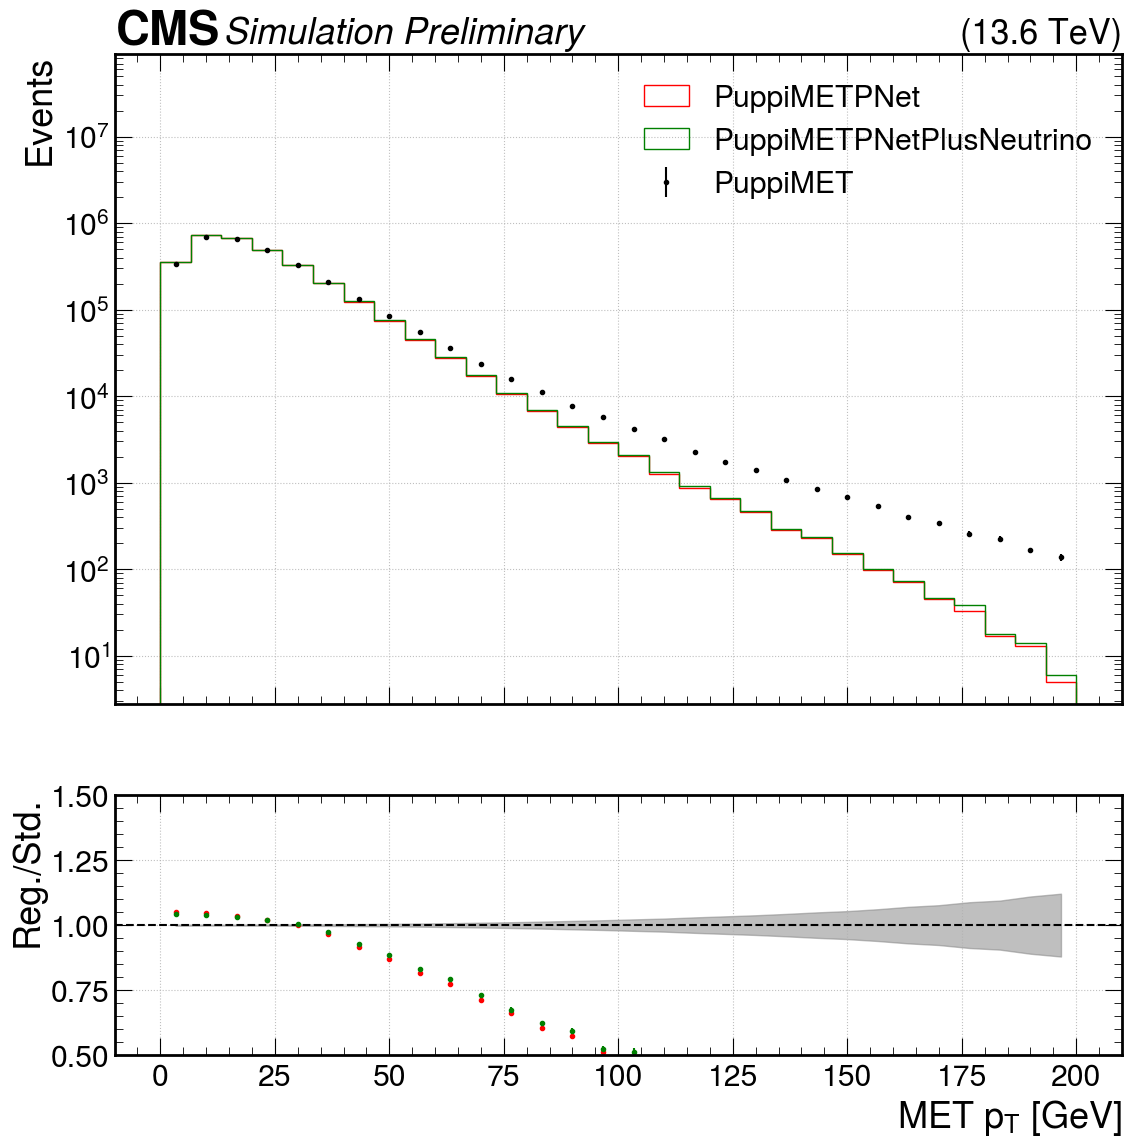

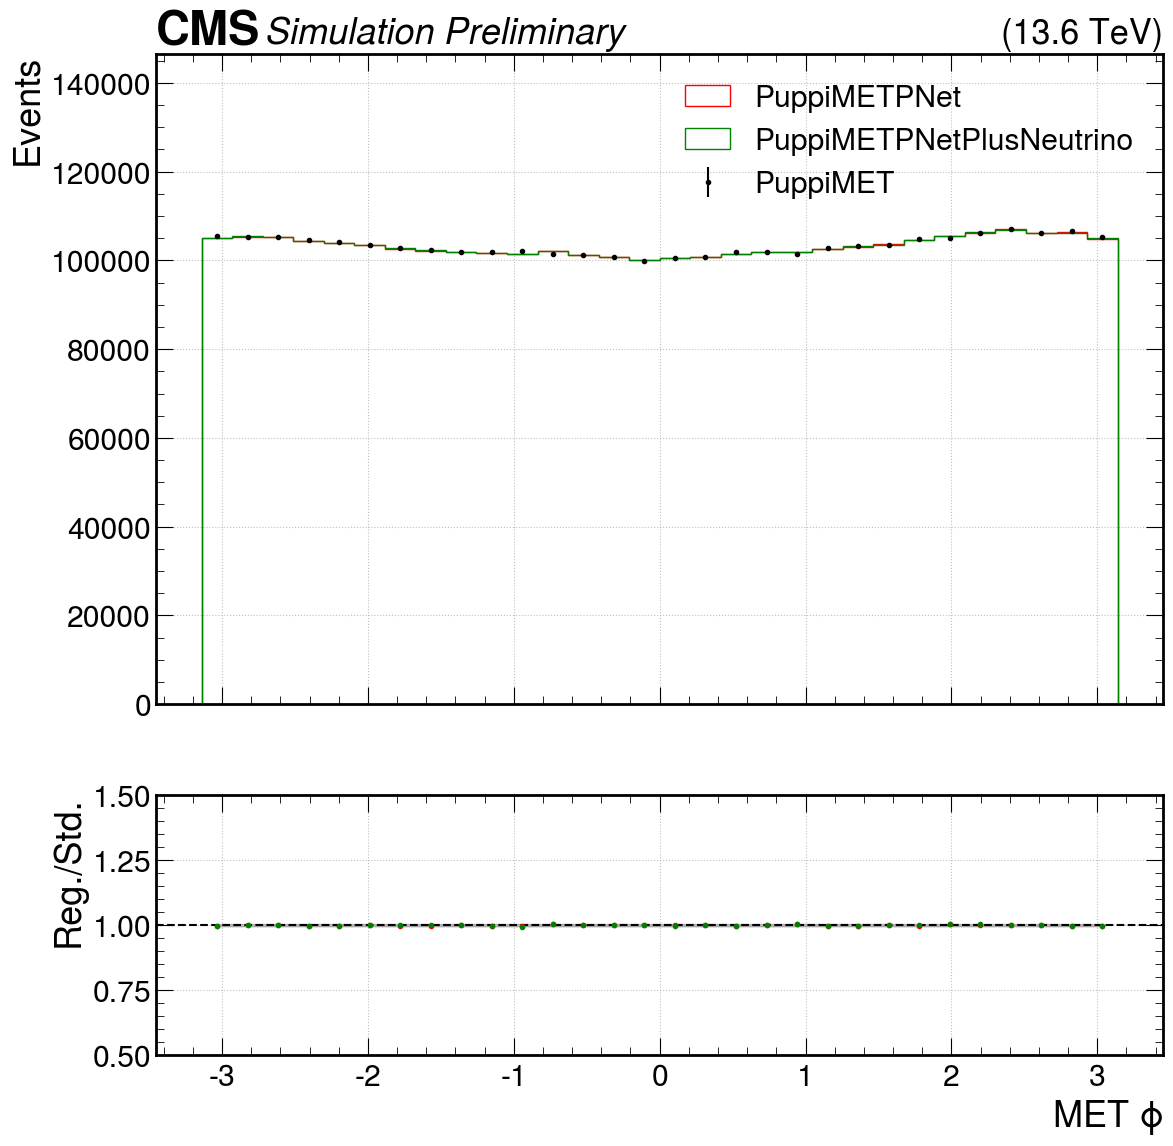

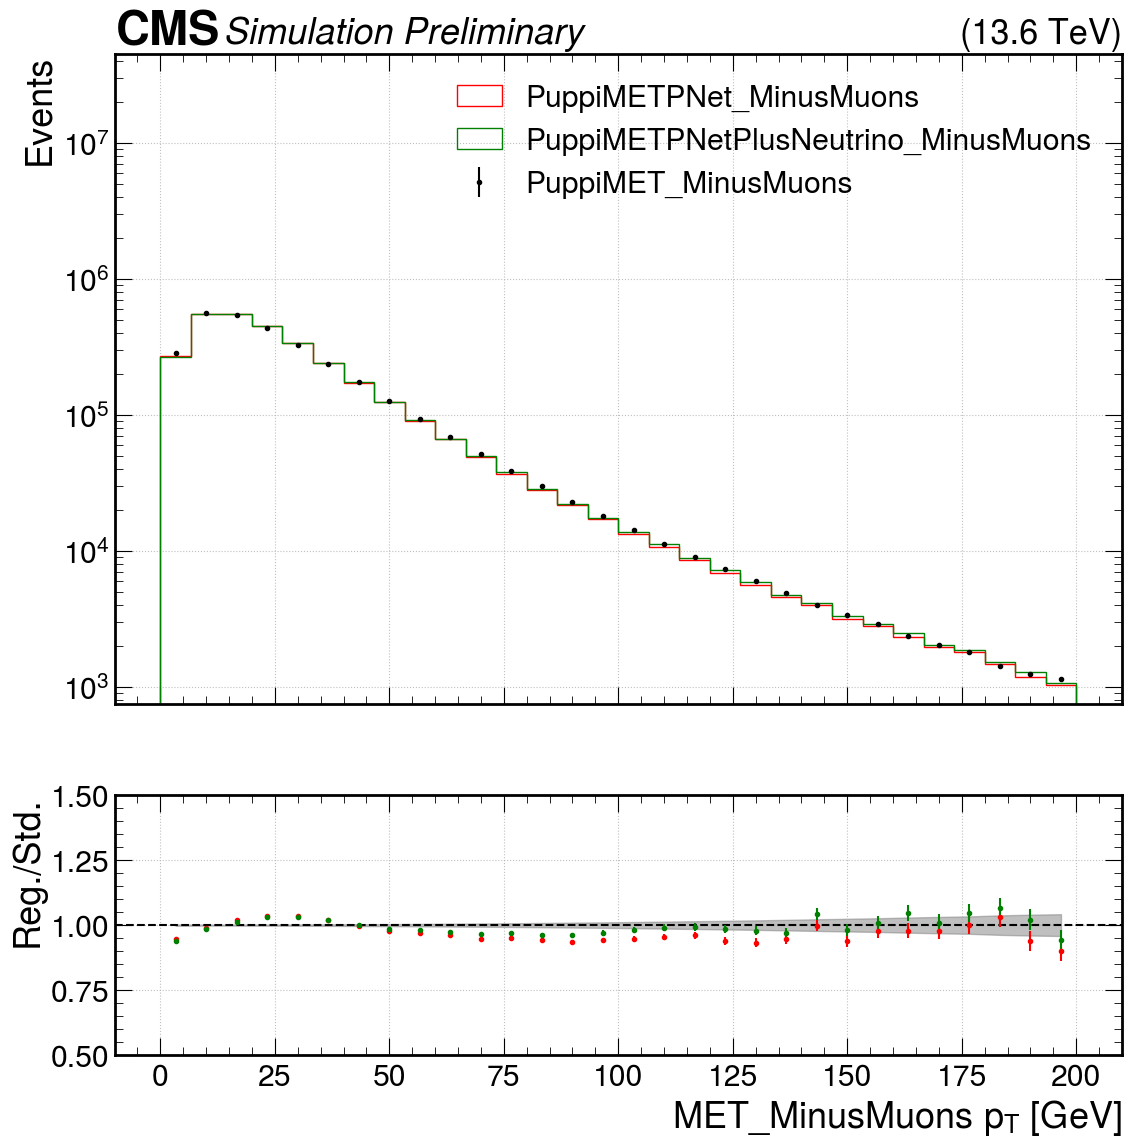

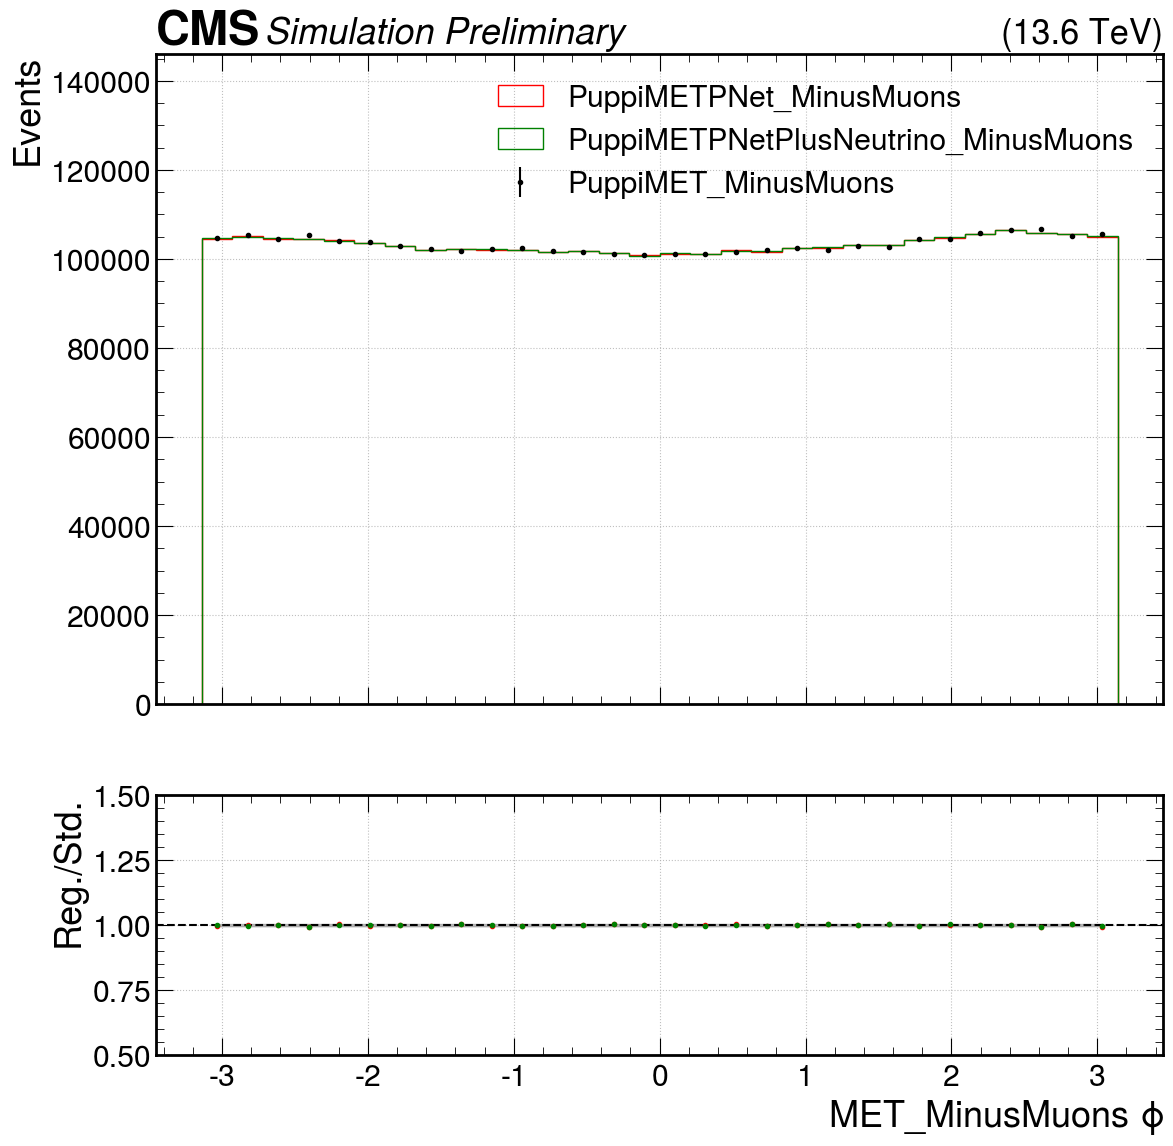

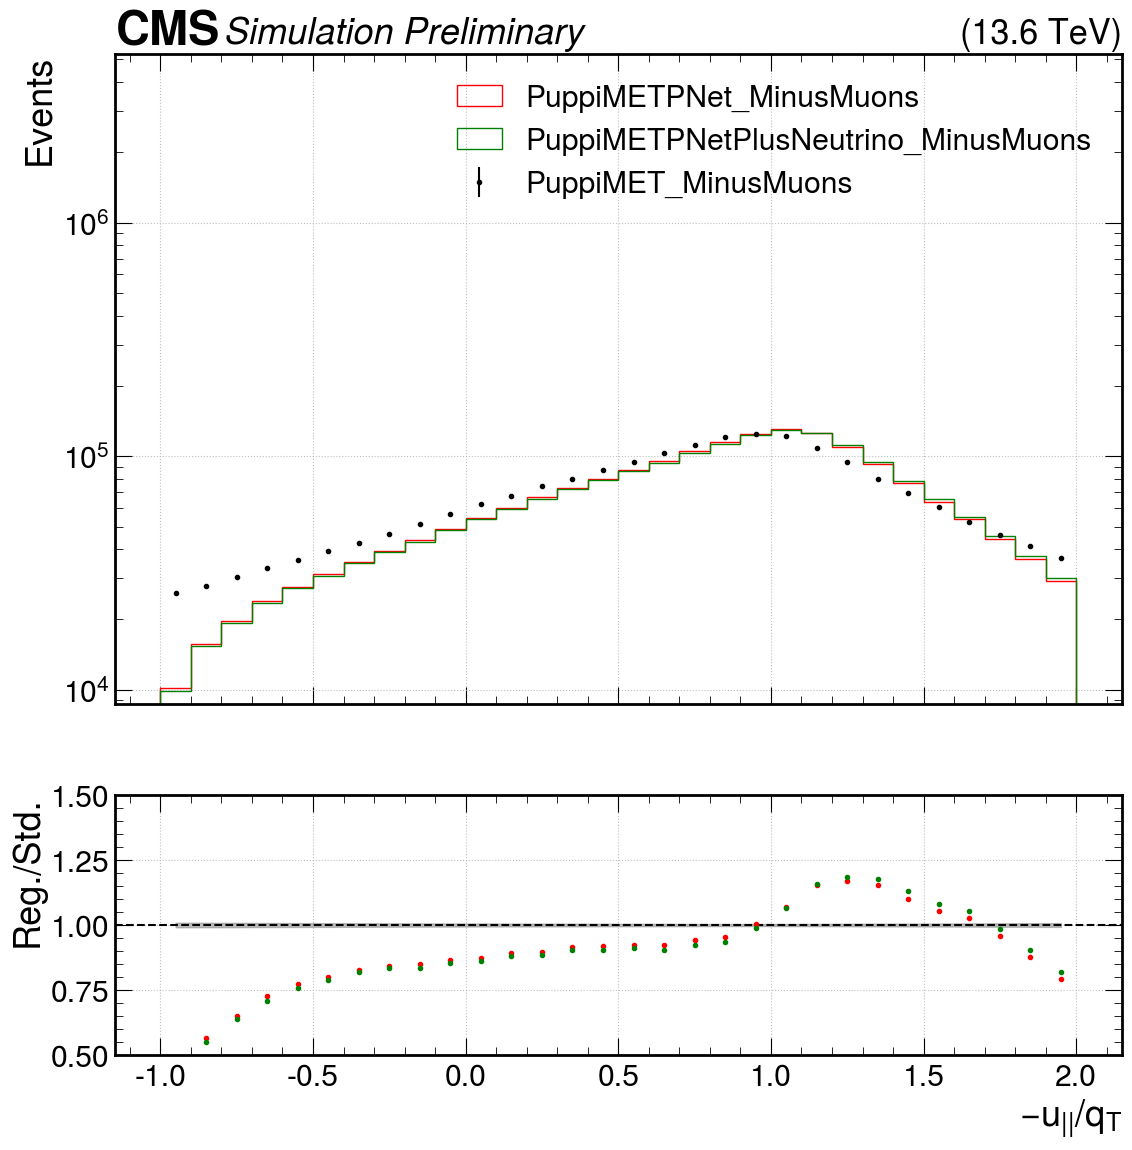

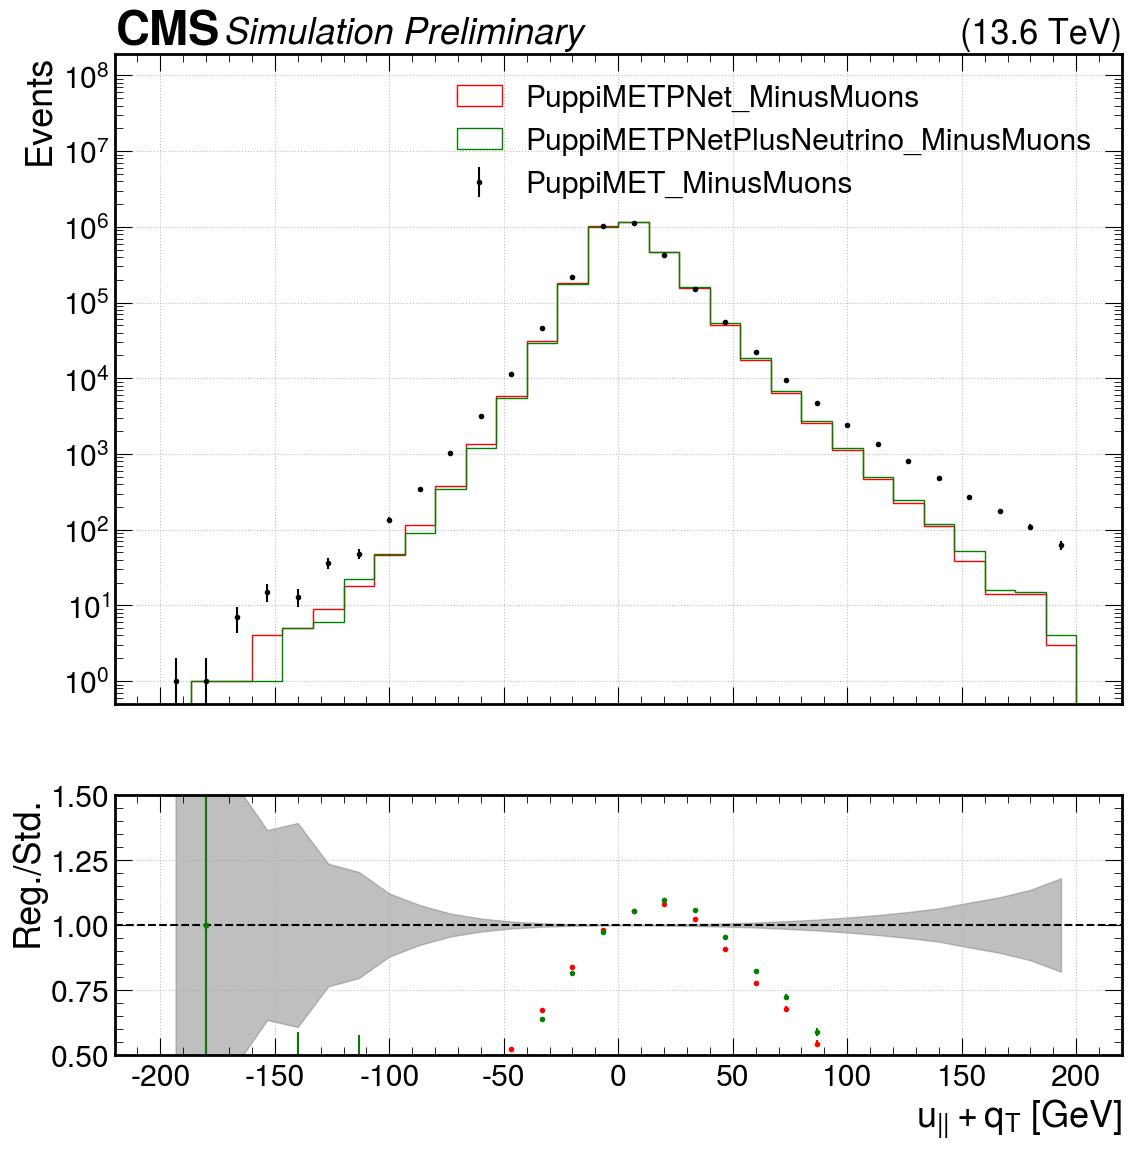

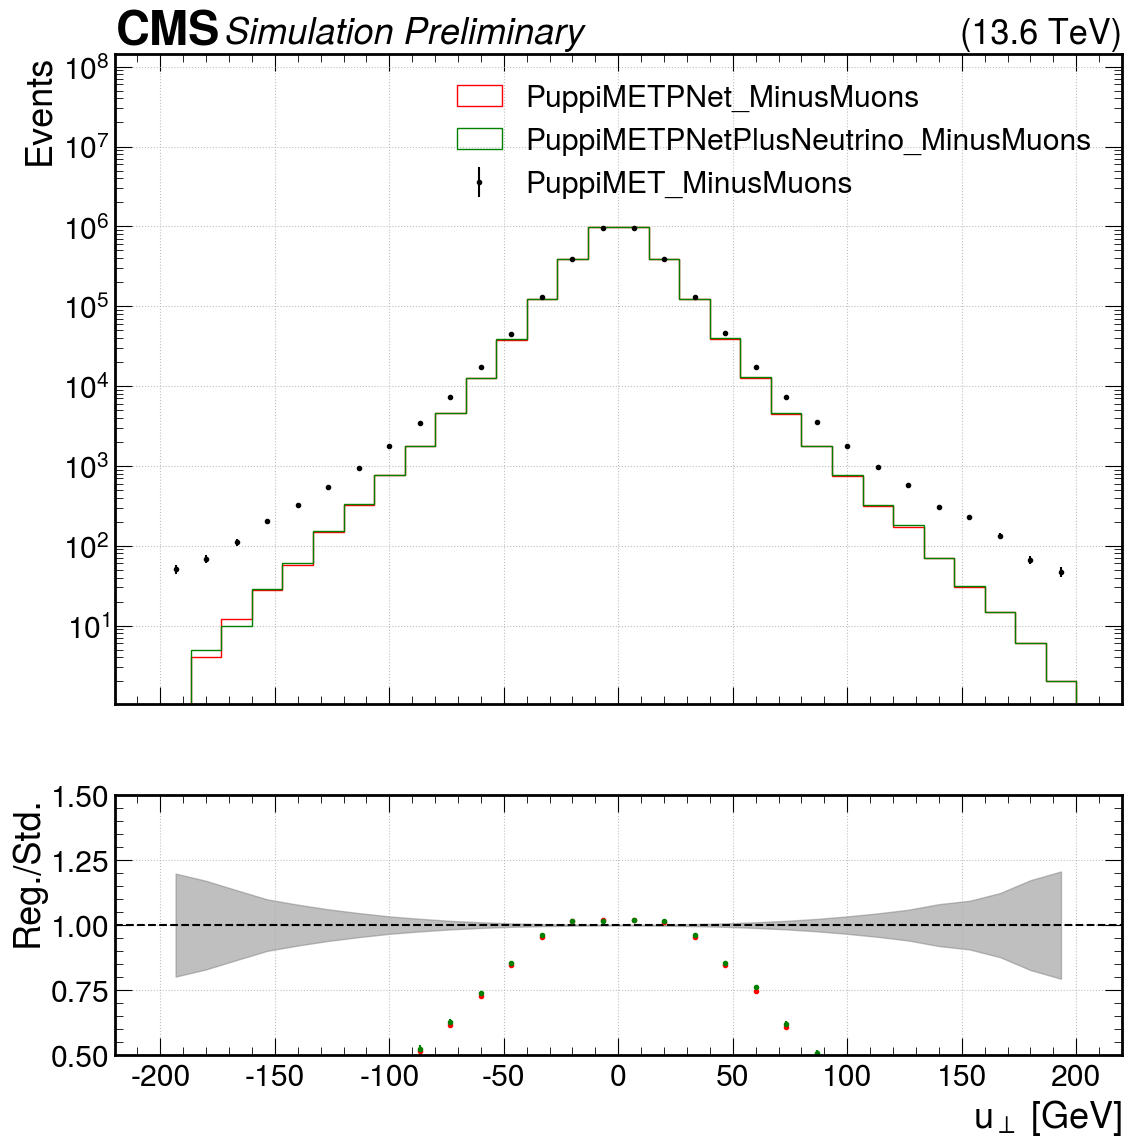

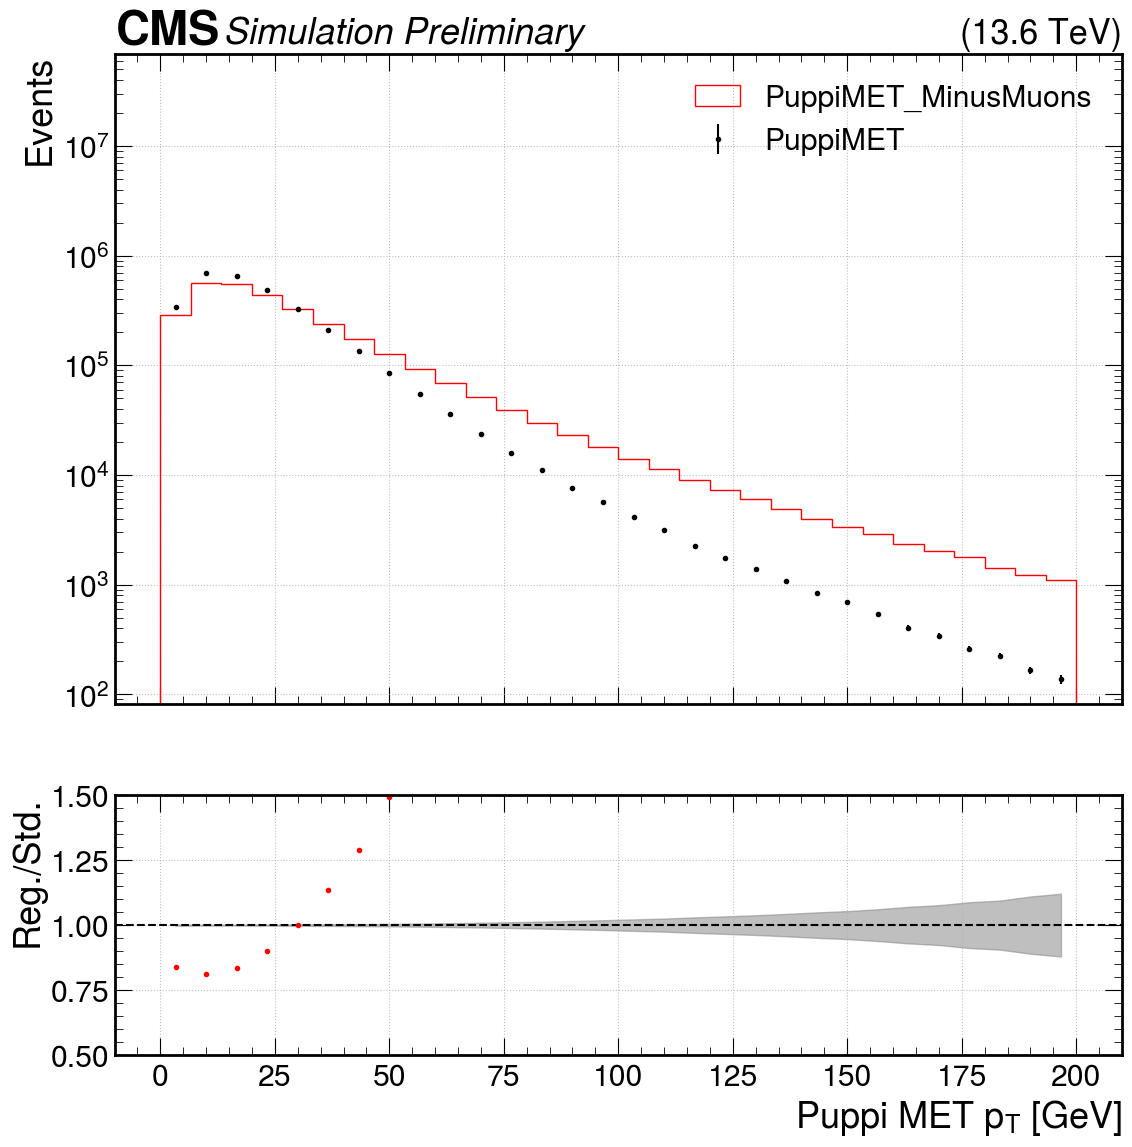

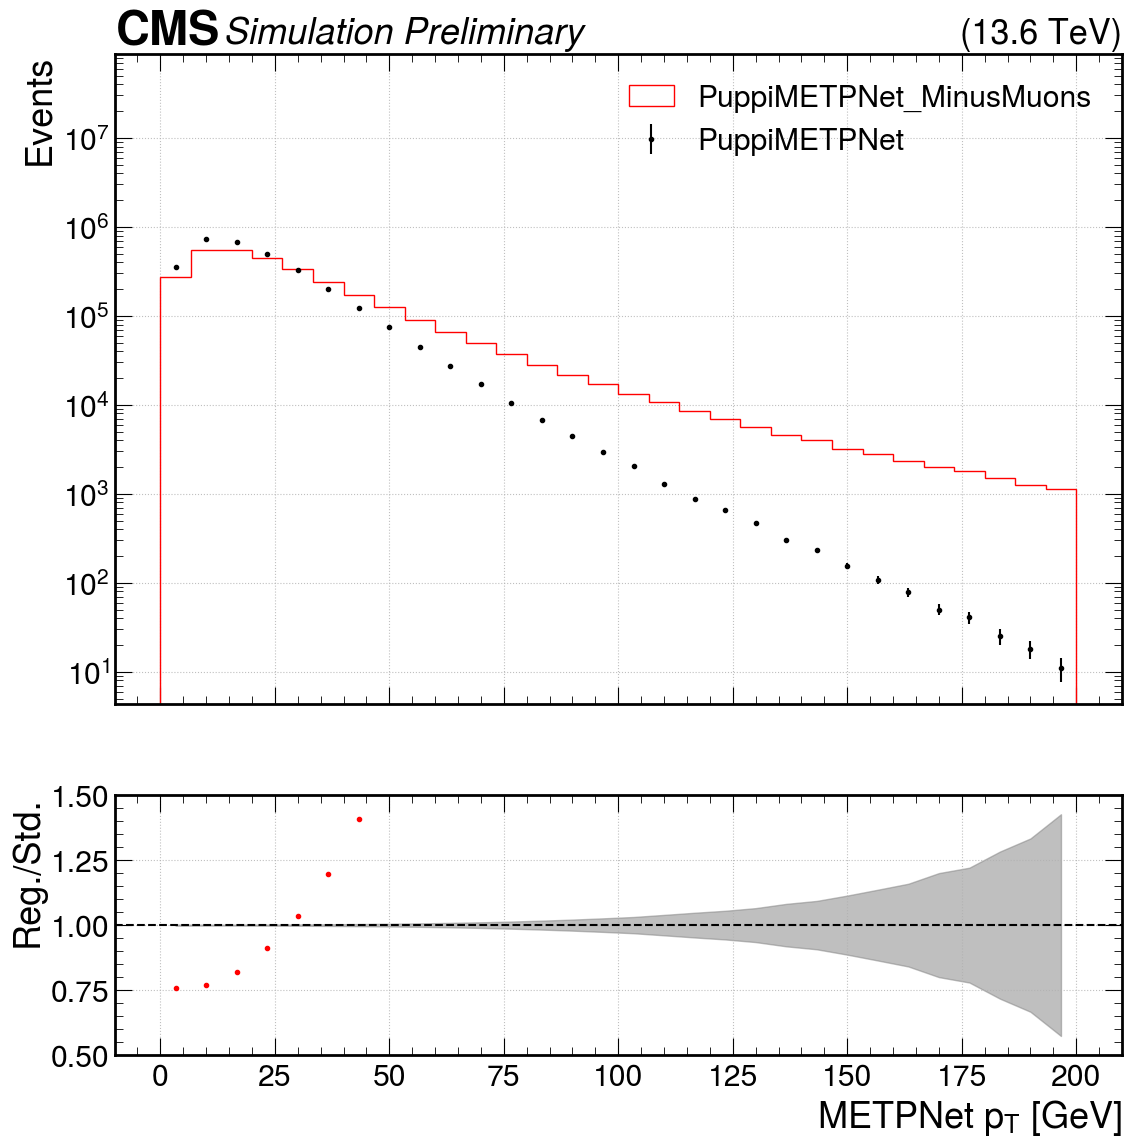

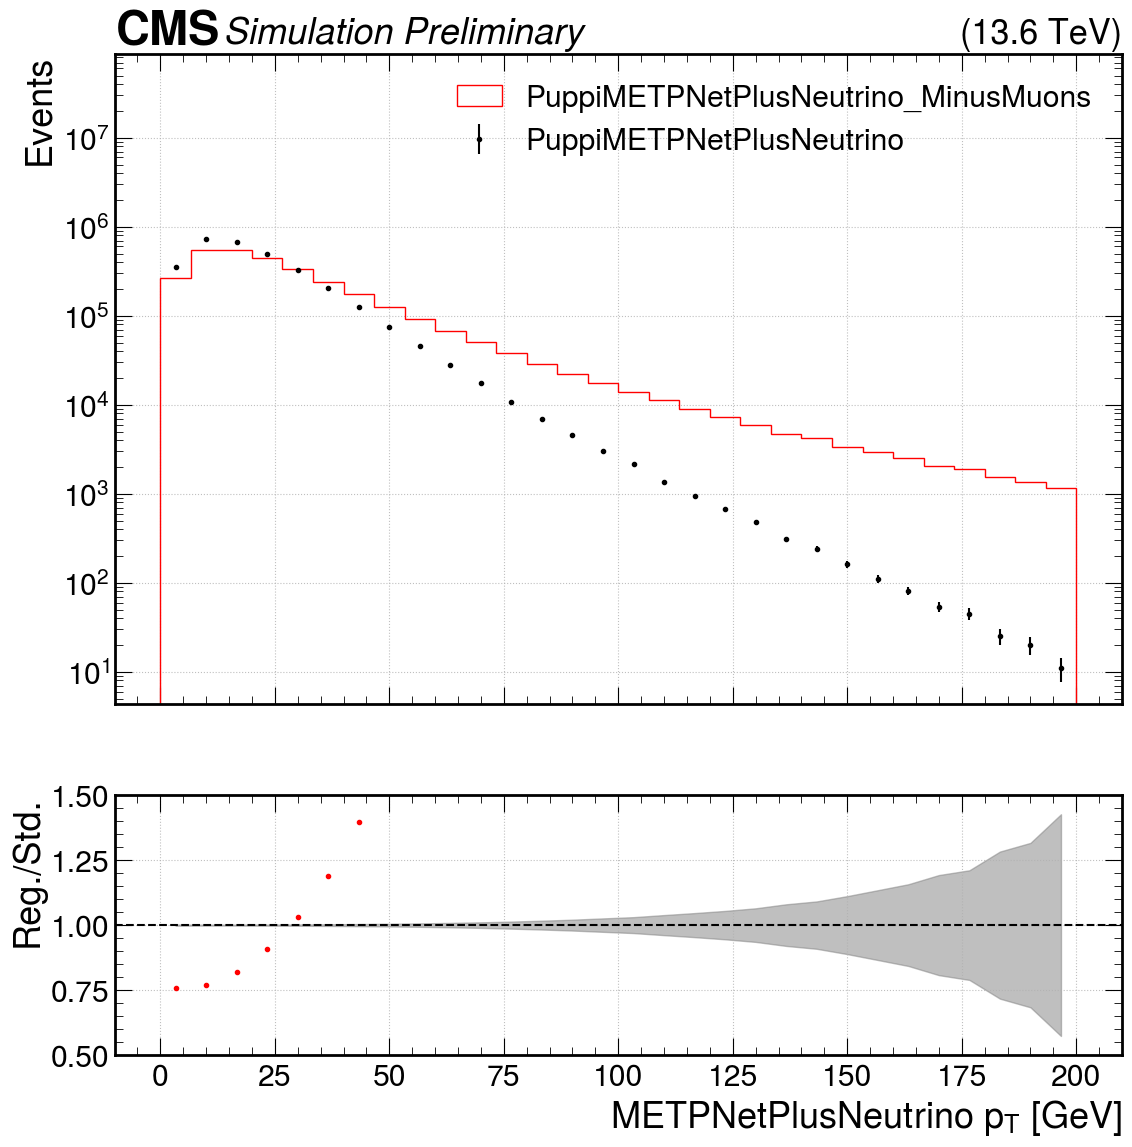

In [18]:
plot_from_columns(accumulator)